**Question 3**

In [19]:
!pip install tsfel
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tsfel
%matplotlib inline
import os
from itertools import product


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
Y_train = np.array(np.load("../Y_train.npy"))
Y_test = np.array(np.load("../Y_test.npy"))

In [21]:
X_train = np.sum(X_train**2, axis = 2)
X_test = np.sum(X_test**2, axis = 2)
classes = {1 : "WALKING",2 :"WALKING_UPSTAIRS",3 : "WALKING_DOWNSTAIRS",4 : "SITTING",5 : "STANDING",6 : "LAYING"}
master_dataset = pd.DataFrame(X_train)

In [22]:
data_df = master_dataset
scaler = StandardScaler()
scaler.fit(data_df)
scaled_data = scaler.transform(data_df)

In [23]:
principal=PCA(n_components=2)
principal.fit(scaled_data)
reduced_data=principal.transform(scaled_data)

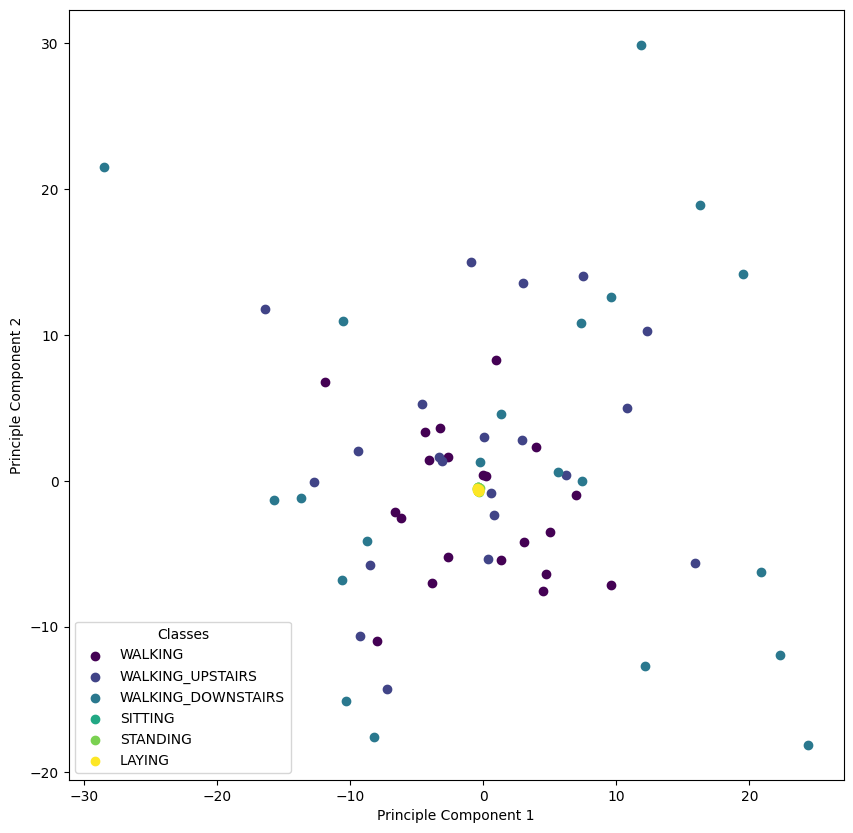

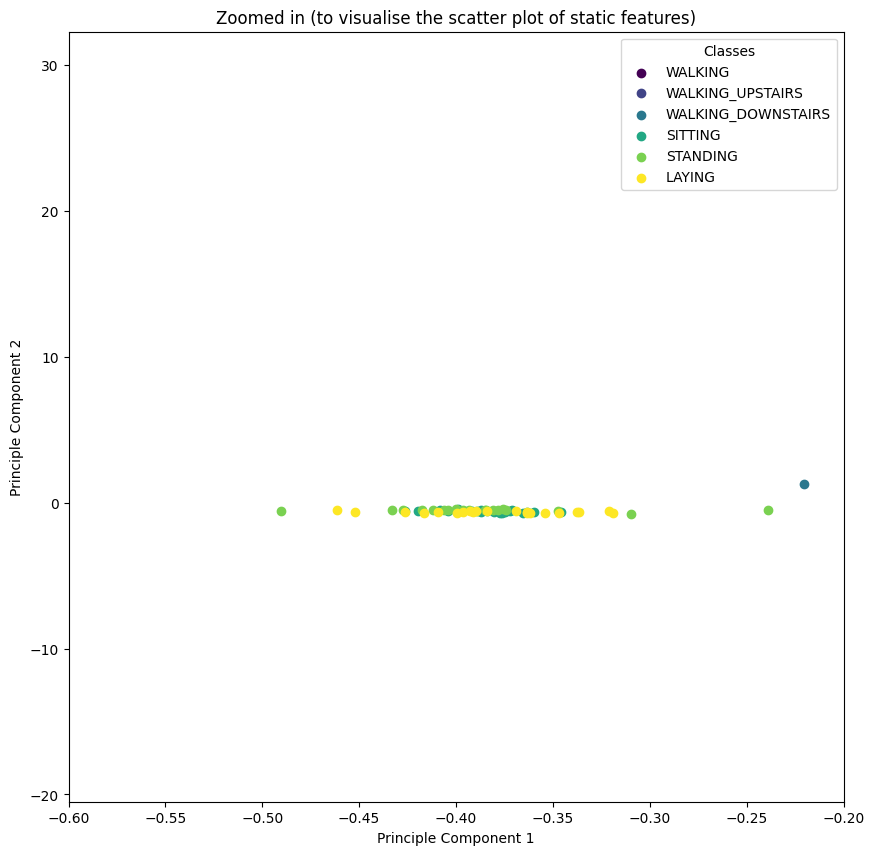

In [24]:
labels = Y_train
labels_test = Y_test
unique_labels = np.unique(labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[:, 0][labels==label], reduced_data[:, 1][labels==label], color=cmap(i), label= classes[label])

plt.legend(title='Classes')
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.show()

plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[:, 0][labels==label], reduced_data[:, 1][labels==label], color=cmap(i), label= classes[label])

plt.legend(title='Classes')
plt.xlim(-0.6,-0.2)
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.title("Zoomed in (to visualise the scatter plot of static features)")
plt.show()


Above we have plotted the scatter plot of the two features obtained after performing PCA on the 500 feature timeseries and compressing it to two  features. There is not much seperation between the classes and the dynamic activities are just spread across each other. The static activiities on the other hand are grouped up in the middle and also suffer from the same problem i.e not having any clear boundary between them.

In [27]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
cfg = tsfel.get_features_by_domain()
feature_df = tsfel.time_series_features_extractor(cfg, X_train, verbose = 0, fs = 50)
feature_df_test = tsfel.time_series_features_extractor(cfg, X_test, verbose = 0, fs = 50)

In [28]:
scaler_new = StandardScaler()
scaled_feature_data = scaler_new.fit_transform(feature_df)
principal_new=PCA(n_components=2)
principal_new.fit(scaled_feature_data)
reduced_feature_data=principal_new.transform(scaled_feature_data)

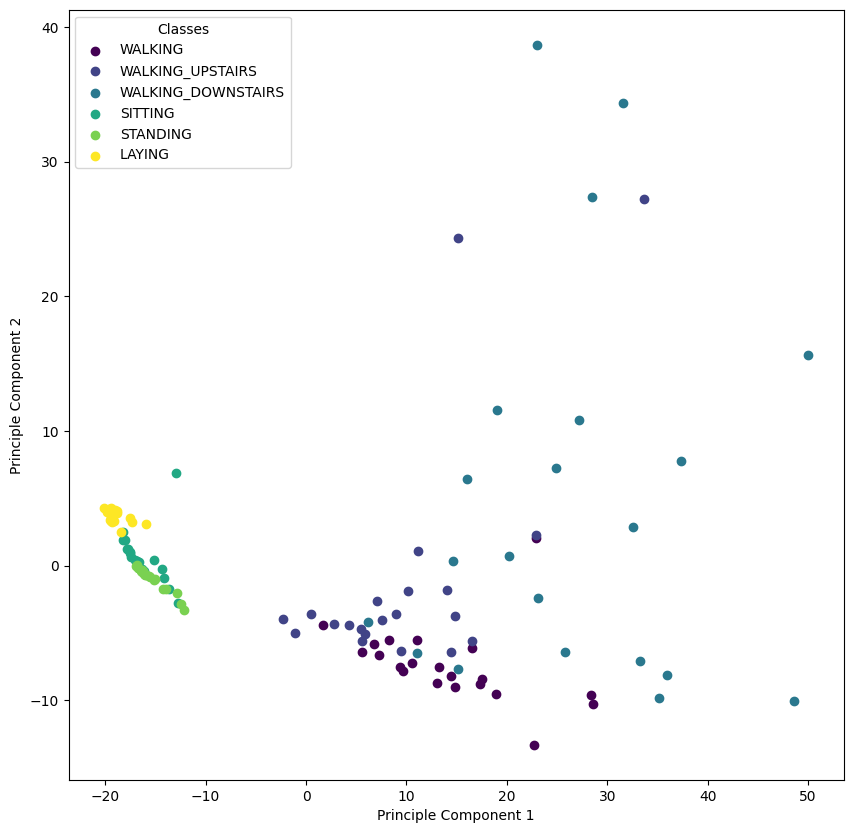

In [29]:
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_feature_data[:, 0][labels==label], reduced_feature_data[:, 1][labels==label], color=cmap(i), label = classes[label])

plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.legend(title='Classes')
plt.show()

Above we have plotted the scatter plot of the principal components obtained after performing PCA on the features obtained by using TSFEL. Noticably the results are much better than we got previously and some seperation can be seen in the data. Although the boundaries are not very clear, its much better than we got by performing PCA directly on the timeseries.

In [30]:
dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',delim_whitespace=True,header=None)

In [31]:
scaler_new = StandardScaler()
scaled_feature_data_UCI = scaler_new.fit_transform(dataframeX)
principal_new=PCA(n_components=2)
principal_new.fit(scaled_feature_data_UCI)
reduced_feature_data_UCI = principal_new.transform(scaled_feature_data_UCI)

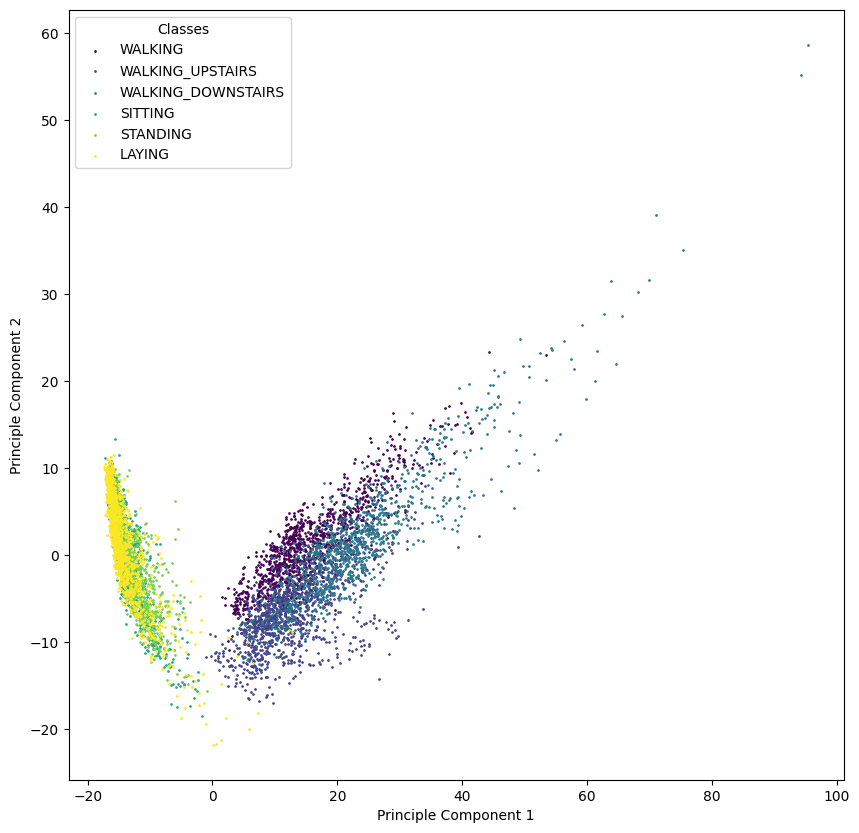

In [32]:
labels_num = dataframeY.iloc[:,0].to_numpy()
unique_labels = np.unique(labels_num)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_feature_data_UCI[:, 0][labels_num==label], reduced_feature_data_UCI[:, 1][labels_num==label], color=cmap(i), label = classes[label], s = 0.9)

plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.legend(title='Classes')
plt.show()


After performing PCA on the features already provided by the Authors, we get some good seperation in the regions in the scatter plot, the prolem with static points still persists, although its intensity has been reduced, but seperation between the other activites is much better than the previous cases.

Althought its not very easy to compare the three ways we have used, since the first two have 126 points and the third one has 7000 points, we could say that the third method is best for visualising the data.

**Question 4**

Here we have calculated the correlation coefficient matrix for the features provided already in the UCI HAR dataset. A heatmap is also plotted for better visualisation (labels ommitted for clarity) and the highly correlated paris  of features are also displayed(correlation coefficient > 0.98 are displayed.).

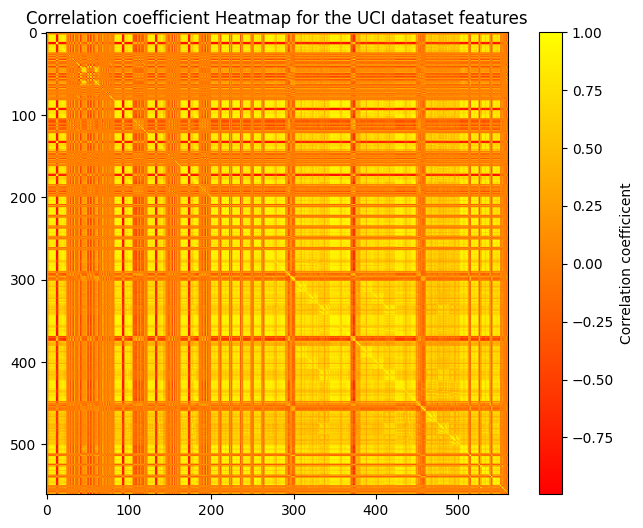

,feature1,feature2
0,tBodyAcc-mad()-X,tBodyAcc-std()-X
1,tBodyAcc-mad()-Y,tBodyAcc-std()-Y
2,tBodyAcc-mad()-Z,tBodyAcc-std()-Z
3,tBodyAcc-max()-X,tBodyAcc-std()-X
4,tBodyAcc-iqr()-X,tBodyAcc-std()-X
...,...,...
475,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-mad()
476,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-sma()
477,fBodyBodyGyroJerkMag-entropy(),tBodyAccJerkMag-entropy()
478,fBodyBodyGyroJerkMag-entropy(),fBodyGyro-entropy()-Y


In [33]:
corr_matrix_dataset_features = dataframeX.corr()

plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix_dataset_features, cmap='autumn')

plt.colorbar(label="Correlation coefficicent")
plt.title('Correlation coefficient Heatmap for the UCI dataset features')
plt.show()

corr_matrix_dataset_features.columns = feature_labels.iloc[:,1].to_numpy()

corr_matrix_dataset_features.index = feature_labels.iloc[:,1].to_numpy()

redundancies_UCI = pd.DataFrame(columns=["feature1", "feature2"])

for i in (range(len(corr_matrix_dataset_features))):
    for j in (range(len(corr_matrix_dataset_features))):
        if(corr_matrix_dataset_features.iloc[i,j] > 0.98 and i > j):
            redundancies_UCI.loc[len(redundancies_UCI)] = [corr_matrix_dataset_features.index[i], corr_matrix_dataset_features.columns[j]]

redundancies_UCI

**Correaltion matrix for features obtained from TSFEL featurisation** is as follows:

Before plotting the correlation matrix, we drop the columns which have zero variance, since these features wont be useful and their correlation coefficient is also undefined.

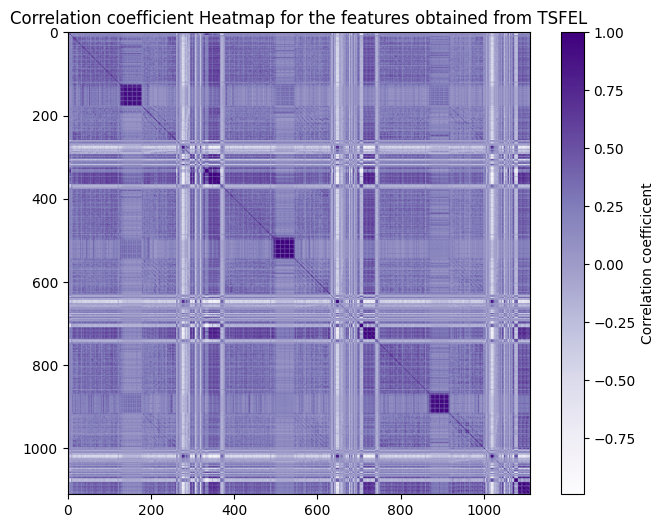

,feature1,feature2
0,0_Area under the curve,0_Absolute energy
1,0_Average power,0_Absolute energy
2,0_Average power,0_Area under the curve
3,0_FFT mean coefficient_214,0_FFT mean coefficient_211
4,0_FFT mean coefficient_215,0_FFT mean coefficient_210
...,...,...
1489,2_Wavelet variance_0,2_Signal distance
1490,2_Wavelet variance_4,2_Wavelet variance_3
1491,2_Wavelet variance_5,2_Wavelet variance_4
1492,2_Wavelet variance_6,2_Wavelet variance_5


In [34]:
# remove the features where the variance is zero, since these features arent useful and the correaltion coefficient is also zero.
feature_df = feature_df.loc[:, feature_df.nunique() != 1]

corr_matrix_tsfel_features = feature_df.corr()

plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix_tsfel_features, cmap='Purples')

plt.colorbar(label="Correlation coefficicent")
plt.title('Correlation coefficient Heatmap for the features obtained from TSFEL')
plt.show()


redundancies_TSFEL = pd.DataFrame(columns=["feature1", "feature2"])

for i in (range(len(corr_matrix_tsfel_features))):
    for j in (range(len(corr_matrix_tsfel_features))):
        if(corr_matrix_tsfel_features.iloc[i,j] > 0.98 and i > j):
            redundancies_TSFEL.loc[len(redundancies_TSFEL)] = [corr_matrix_tsfel_features.index[i], corr_matrix_tsfel_features.columns[j]]


redundancies_TSFEL
